In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})

df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [3]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [5]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [7]:
df_nomiss = df.dropna(subset = ['score', 'sex'])

df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [8]:
df_nomiss2 = df.dropna()

df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [9]:
df['score'].mean()

4.0

In [10]:
df['score'].sum()

16.0

In [11]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                    sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [12]:
exam = pd.read_csv('exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [13]:
exam['math'].mean()

55.23529411764706

In [14]:
exam['math'] = exam['math'].fillna(55)

exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [15]:
exam['math'].isna().sum()

0

In [16]:
mpg = pd.read_csv('mpg.csv')

mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [17]:
pd.isna(mpg).sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             5
fl              0
category        0
dtype: int64

In [18]:
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [19]:
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean = ('hwy', 'mean'))

,mean
drv,
4,19.242424
f,28.200000
r,21.000000


In [20]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                  'score' : [5, 4, 3, 4, 2, 6]})

df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [21]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [22]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [23]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [24]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])

df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [25]:
df.dropna(subset = ['sex', 'score'])\
    .groupby('sex')\
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='hwy'>

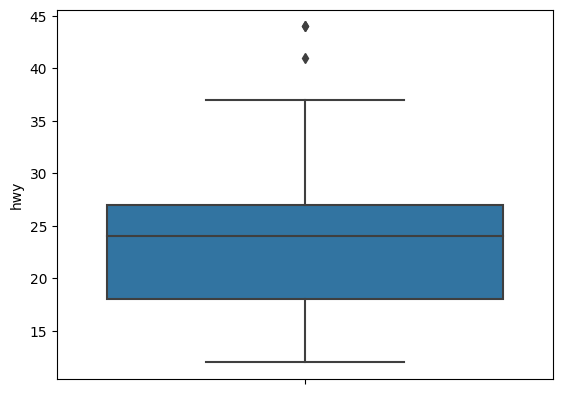

In [28]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [29]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [30]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [31]:
iqr = pct75 - pct25
iqr

9.0

In [32]:
pct25 - 1.5 * iqr

4.5

In [33]:
pct75 + 1.5 * iqr

40.5

In [34]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                      np.nan, mpg['hwy'])

mpg['hwy'].isna().sum()

3

In [35]:
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
        .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
